# Running Parallel Analysis for Lexical Diversity 

The following tutorial is taken from [TAALED repository](https://lcr-ads-lab.github.io/TAALED/ld_indices/3.%20LD_write.html)

Please refer to the tutorial there for more information.


In [10]:
from taaled import ld
from pylats import lats

#for creating an output filename
from datetime import datetime 
from datetime import date

#for finding a list of texts
import glob

In [11]:

filenames = glob.glob("../../../corpus_data/sample_for_ld_demo/*.txt")

In [12]:
filenames

['../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_112_ORIG.txt',
 '../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_070_ORIG.txt',
 '../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_124_ORIG.txt']

In [13]:
def outname_creator(fldname,isprll,other = None):
	day = date.today().strftime("%Y%m%d") #get date
	time = datetime.now().strftime("%H%M%S")
	ldv = "taaledv" + ld.version
	# latsv = "pylatsv" + lats.version
	if isprll == True: # we are going to think about only the "nopa" option in this tutorial.
		pa = "pa"
	else:
		pa = "nopa"

	if other == None:
		outn = "_".join([day,time,fldname,pa]) + ".txt"
	else:
		outn = "_".join([day,time,fldname,pa,other]) + ".txt"

	return(outn)
	
	
outname = outname_creator("sample",False)	

In [14]:
ld.ldwrite(filenames,outname)

1 of 3 ../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_112_ORIG.txt
Please define a parameters class (e.g., params = lats.ld_params_en). Stopping program.
3 files considered 
 0 files skipped due to length issues: 
 [] 
 0 files successfully processed by TAALED


In [37]:
ld.ldwrite(filenames, outname, 
           mn = 20,
           mx = 200, 
           interval = 20, 
           prll = True, 
           params = lats.ld_params_en)

1 of 3 ../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_112_ORIG.txt
2 of 3 ../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_070_ORIG.txt
3 of 3 ../../../corpus_data/sample_for_ld_demo/GRA_PTJ0_124_ORIG.txt
3 files considered 
 0 files skipped due to length issues: 
 [] 
 3 files successfully processed by TAALED


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the parallel analysis data into a DataFrame
df = pd.read_csv("20250727_134615_sample_nopa.txt", sep='\t')

# Display basic info about the DataFrame
print("DataFrame shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nUnique filenames:", df['filename'].unique())

DataFrame shape: (30, 15)

Column names: ['filename', 'length', 'ntokens', 'ntypes', 'mtld', 'mtld92', 'mtldo', 'mattr', 'mattr11', 'ttr', 'rttr', 'lttr', 'maas', 'msttr', 'hdd']

First few rows:
                filename  length  ntokens  ntypes       mtld     mtld92  \
0  GRA_PTJ0_112_ORIG.txt      20       20    17.4  55.440000  15.982000   
1  GRA_PTJ0_112_ORIG.txt      40       40    28.0  36.717737  14.683333   
2  GRA_PTJ0_112_ORIG.txt      60       60    37.0  47.302778  15.595000   
3  GRA_PTJ0_112_ORIG.txt      80       80    45.5  38.655250  16.159091   
4  GRA_PTJ0_112_ORIG.txt     100      100    51.0  42.347917  19.952381   

       mtldo     mattr   mattr11       ttr      rttr      lttr      maas  \
0  55.440000  0.870000  0.949091  0.870000  3.890758  0.952698  0.036358   
1  40.681200  0.700000  0.955152  0.700000  4.427189  0.902472  0.060877   
2  40.174376  0.661212  0.953333  0.616667  4.776679  0.881690  0.066535   
3  38.790414  0.671290  0.950000  0.568750  5.087

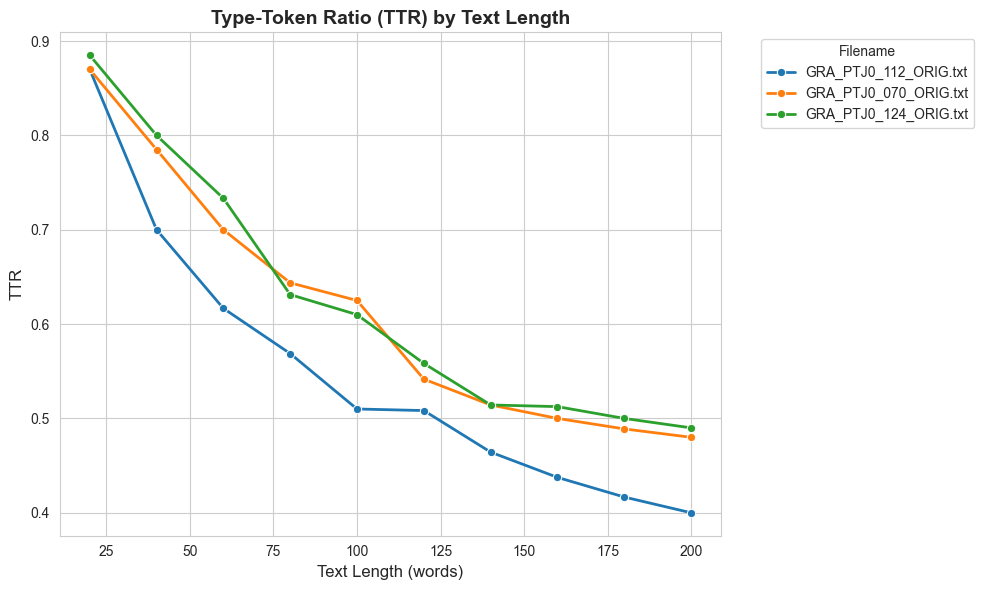

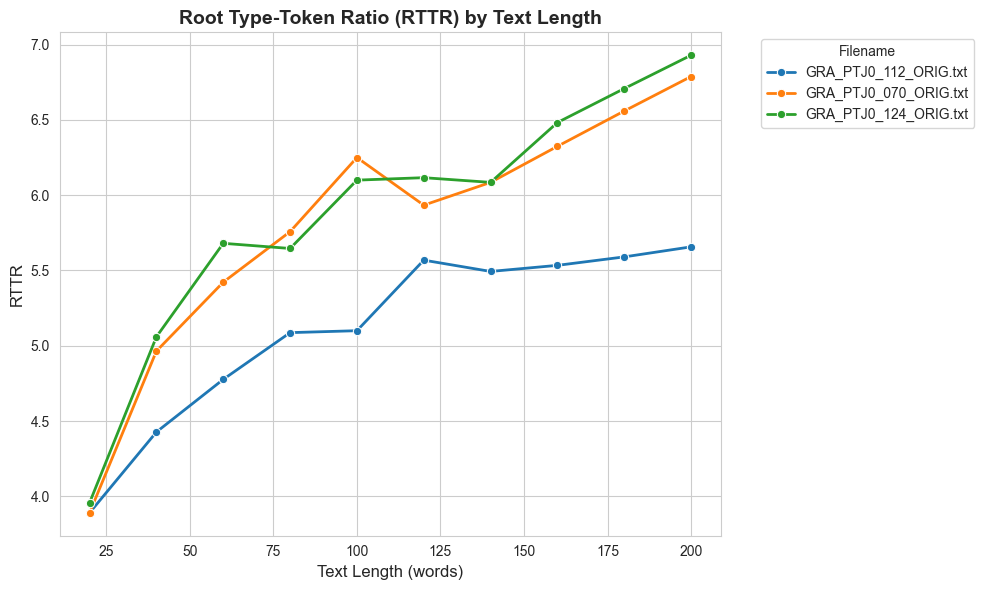

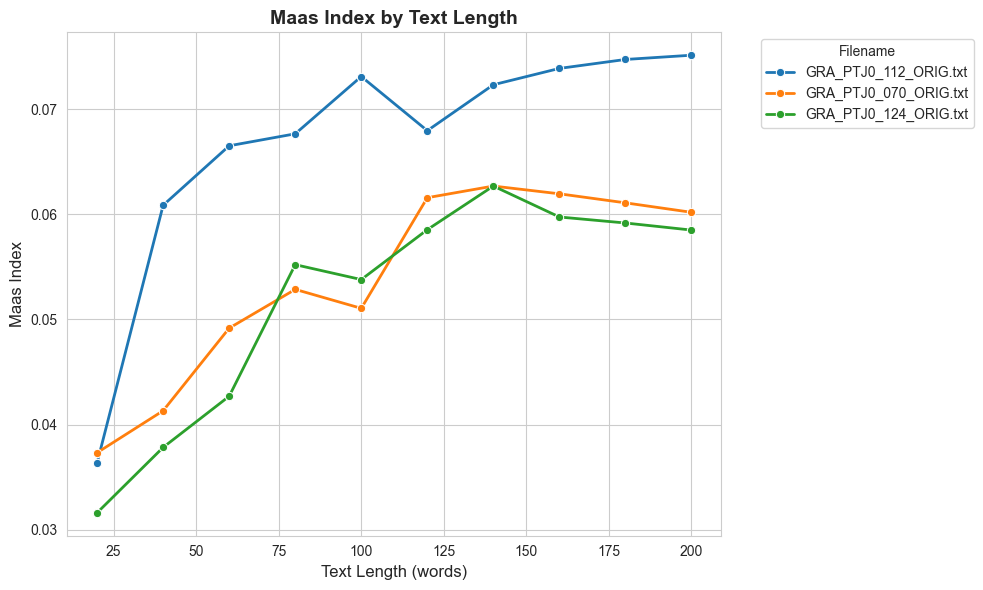

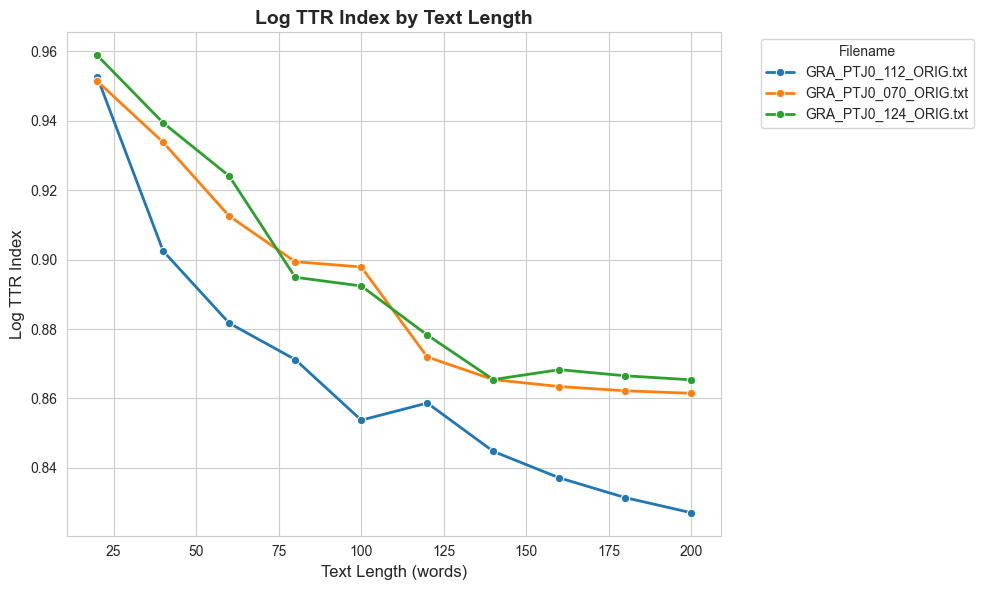

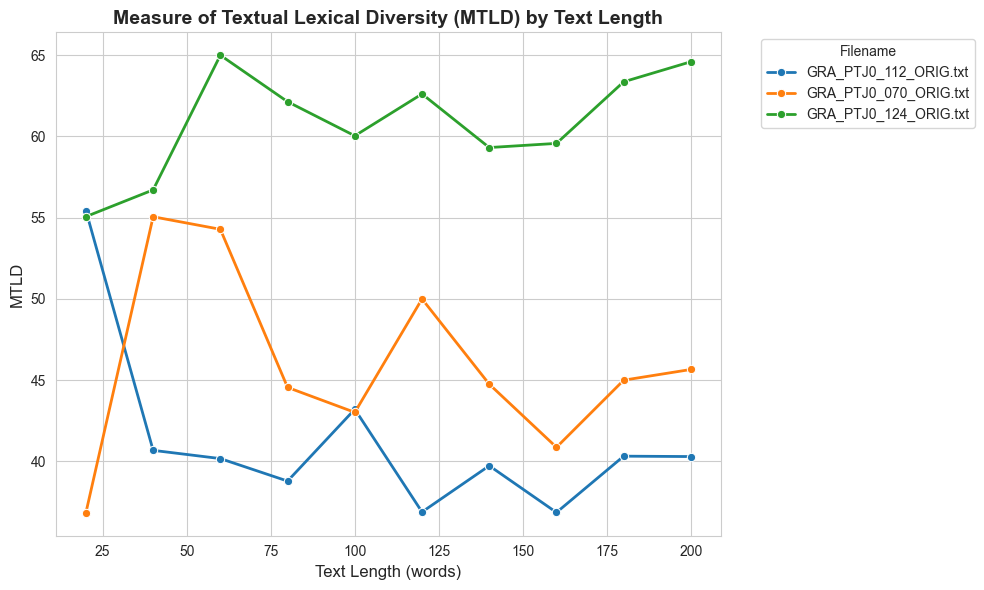

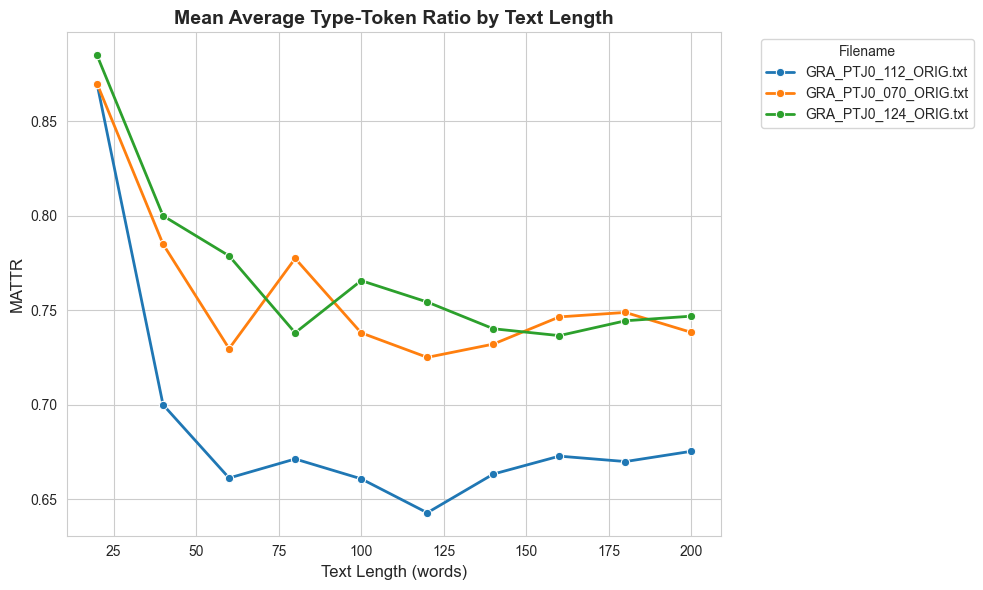

In [40]:
# Set up the plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Create four separate plots for each lexical diversity metric

# 1. TTR (Type-Token Ratio) Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='length', y='ttr', hue='filename', marker='o', linewidth=2, markersize=6)
plt.title('Type-Token Ratio (TTR) by Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (words)', fontsize=12)
plt.ylabel('TTR', fontsize=12)
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. RTTR (Root Type-Token Ratio) Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='length', y='rttr', hue='filename', marker='o', linewidth=2, markersize=6)
plt.title('Root Type-Token Ratio (RTTR) by Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (words)', fontsize=12)
plt.ylabel('RTTR', fontsize=12)
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Maas Index Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='length', y='maas', hue='filename', marker='o', linewidth=2, markersize=6)
plt.title('Maas Index by Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (words)', fontsize=12)
plt.ylabel('Maas Index', fontsize=12)
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Log TTR Index Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='length', y='lttr', hue='filename', marker='o', linewidth=2, markersize=6)
plt.title('Log TTR Index by Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (words)', fontsize=12)
plt.ylabel('Log TTR Index', fontsize=12)
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. MTLD (Measure of Textual Lexical Diversity) Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='length', y='mtldo', hue='filename', marker='o', linewidth=2, markersize=6)
plt.title('Measure of Textual Lexical Diversity (MTLD) by Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (words)', fontsize=12)
plt.ylabel('MTLD', fontsize=12)
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. MTLD (Measure of Textual Lexical Diversity) Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='length', y='mattr', hue='filename', marker='o', linewidth=2, markersize=6)
plt.title('Mean Average Type-Token Ratio by Text Length', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (words)', fontsize=12)
plt.ylabel('MATTR', fontsize=12)
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
# Summary statistics for each metric by filename
print("\n" + "="*60)
print("SUMMARY STATISTICS BY FILENAME")
print("="*60)

metrics = ['ttr', 'rttr', 'maas', 'mtld']
for metric in metrics:
    print(f"\n{metric.upper()} Summary:")
    print(df.groupby('filename')[metric].agg(['mean', 'std', 'min', 'max']).round(4))


SUMMARY STATISTICS BY FILENAME

TTR Summary:
                         mean     std    min     max
filename                                            
GRA_PTJ0_070_ORIG.txt  0.5825  0.1273  0.448  0.8750
GRA_PTJ0_112_ORIG.txt  0.5095  0.1395  0.368  0.8708
GRA_PTJ0_124_ORIG.txt  0.5968  0.1314  0.476  0.8958

RTTR Summary:
                         mean     std     min     max
filename                                             
GRA_PTJ0_070_ORIG.txt  6.0991  0.8230  3.9131  7.1005
GRA_PTJ0_112_ORIG.txt  5.2486  0.4906  3.8945  5.8186
GRA_PTJ0_124_ORIG.txt  6.2516  0.8723  4.0063  7.5262

MAAS Summary:
                         mean     std     min     max
filename                                             
GRA_PTJ0_070_ORIG.txt  0.0550  0.0082  0.0353  0.0630
GRA_PTJ0_112_ORIG.txt  0.0692  0.0101  0.0364  0.0781
GRA_PTJ0_124_ORIG.txt  0.0522  0.0100  0.0285  0.0627

MTLD Summary:
                          mean      std      min      max
filename                                      